In [1]:
import pymodwt.modwt
import numpy as np


In [110]:
# make a random signal with 128 points
x = np.random.randn(2048)*0.05 + np.cos(2*np.pi*np.arange(2048)/512.)
t = np.asarray([np.datetime64('2018-01-01') + i*np.timedelta64(1,'m') for i in range(2048)])

# x=np.zeros(128)
# x[40:46] = 0.5*np.cos(3*np.pi*np.arange(40,46)/16. + 0.08)
wa,sc = pymodwt.modwt.modwt (x, boundary='periodic',wtf='la8')
de,sm = pymodwt.modwt.imodwt_mra(wa, sc)
war,scr = pymodwt.modwt.cir_shift(wa,sc,subtract_mean_VJ0t=True)
varw,vars = pymodwt.modwt.rot_cum_wav_svar(wa,sc)

c:\Users\21310917\OneDrive - The University of Western Australia\Code\pymodwt\pymodwt\modwt.py:184: RuntimeWarning: invalid value encountered in cast
  'BCs'      : np.int32(bw)
c:\Users\21310917\OneDrive - The University of Western Australia\Code\pymodwt\pymodwt\modwt.py:197: RuntimeWarning: invalid value encountered in cast
  'BCs'      : np.int32(bv)


In [111]:
ds_wa,ds_low,ds_high = wa.to_xarray({'time':t})
ds_sc = sc.to_xarray({'time':t})

ds_sm = sm.to_xarray({'time':t})
ds_de = de.to_xarray({'time':t})[0]

ds_war = war.to_xarray({'time':t})
ds_scr = scr.to_xarray({'time':t})

c:\Users\21310917\OneDrive - The University of Western Australia\Code\pymodwt\pymodwt\__init__.py:136: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  da = xr.DataArray(self, dims=['j',coord_name], coords={'j':j,coord_name:coord_val}, attrs=self.info)
c:\Users\21310917\OneDrive - The University of Western Australia\Code\pymodwt\pymodwt\__init__.py:141: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision valu

In [118]:
ds_low

<xarray.DataArray (j: 8)>
array([  120.,   240.,   480.,   960.,  1920.,  3840.,  7680., 15360.])
Coordinates:
  * j        (j) int32 1 2 3 4 5 6 7 8
Attributes:
    tau:      60.0

In [119]:
ds_high

<xarray.DataArray (j: 8)>
array([  120.,   240.,   480.,   960.,  1920.,  3840.,  7680., 15360.])
Coordinates:
  * j        (j) int32 1 2 3 4 5 6 7 8
Attributes:
    tau:      60.0

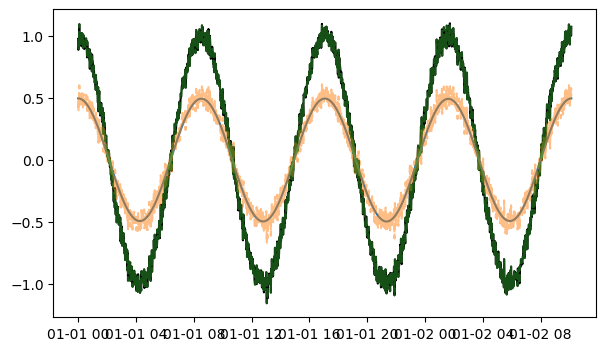

In [117]:
import matplotlib.pyplot as plt
fig,axes = plt.subplots(figsize=(7,4))

axes.plot(t,x,'k',label='original')
axes.plot(t,ds_sm,label='smooths')
axes.plot(t,ds_de.sum('j'),label='details',ls='--',alpha=0.5)
axes.plot(t, ds_sm + ds_de.sum('j'),label='reconstructed',alpha=0.5,ls='--')